In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
import pickle
import matplotlib.pyplot as plt
import boto3

In [6]:
s3 = boto3.client('s3')
bucket = "disaster-tweets-refined"

res = s3.get_object(Bucket=bucket, Key="tweets/final_data.csv")
df = pd.read_csv(res['Body'], engine='c')

's3 = boto3.client(\'s3\')\nbucket = "disaster-tweets-refined"\n\nres = s3.get_object(Bucket=bucket, Key="tweets/final_data.csv")\ndf = pd.read_csv(res[\'Body\'], engine=\'c\')'

In [9]:
df.head()

,Unnamed: 0,id,text,target,finished_lemma,word_count,unique_word_count,stop_words_count,clean_keyword,keyword_,...,keyword_whirlwind,keyword_wildfir,keyword_windstorm,keyword_wound,keyword_wreck,keyword_wreckag,sequences,sequences_reduced,country,city
0,0,6439,#news #metropolitan - Don't allow sycophants h...,0,new metropolitan dont allow sycoph hijack oper...,14,14,42,hijack,0,...,0,0,0,0,0,0,6 4729 10 644 10330 137 747 7005 4730 90 10331...,8624.427373359878 7443.262264242725 -645.02655...,NaN,NaN
1,1,6440,Can you please start a new thread and not hija...,0,plea start new thread hijack tweetissu,12,12,28,hijack,0,...,0,0,0,0,0,0,69 70 6 1260 137 10332 0 0 0 0 0 0 0 0 0 0 0 0...,2951.556440801002 3017.824470150751 -892.06753...,NaN,NaN
2,2,6441,Tesla hacking competition offers $1 million an...,0,tesla hack competit offer million free car som...,16,16,37,hijack,0,...,0,0,0,0,0,0,2492 1599 3108 878 296 306 103 160 137 1430 0 ...,3731.9703486637472 -512.1575264124983 1269.174...,AU,NaN
3,3,6443,"Hey, , with headlines like this every handful ...",0,hei headlin like everi hand protest hijack nat...,16,16,43,hijack,0,...,0,0,0,0,0,0,550 1303 3 129 422 490 137 219 300 0 0 0 0 0 0...,1216.2213304424142 33.010728760251716 700.3008...,US,Los Angeles
4,4,6444,If there is an evil that is trying to attach i...,0,evil try attach destini evid god plan man,26,21,60,hijack,0,...,0,0,0,0,0,0,902 95 3363 1983 958 133 117 27 0 0 0 0 0 0 0 ...,2384.5729374741827 756.3830241116688 891.76435...,NG,NaN


In [10]:
df['clean_keyword'] = df['clean_keyword'].fillna('')
df['country'] = df['country'].fillna('')
df['city'] = df['city'].fillna('')

In [11]:
df.shape

(20350, 151)

In [12]:
df['sequences'] = df['sequences'].apply(lambda x: x.split(" "))
df['sequences_reduced'] = df['sequences_reduced'].apply(lambda x: x.split(" "))

In [13]:
#Dimensión Reducida
tweets = df['sequences_reduced'].apply(pd.Series)

In [14]:
tweets.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,8624.427373359878,7443.262264242725,-645.0265524616295,-2880.7259611119393,-3525.04001732069,-6610.140978084727,-5327.823174755331,-1945.6184495965065,-1590.9678398287253,-2035.772265030407,7009.793508419536,-5017.833311201054,-1281.165128927674,-394.42478590227546,-127.16241755710558
1,2951.556440801002,3017.824470150751,-892.0675395334238,1773.4835879005032,-3310.149692756091,6185.165413082665,46.420119225621896,5880.258975368027,-1642.5395724752357,-101.56315166189486,-261.99164722791573,-61.71131603324796,-172.03747865939263,54.204298099109074,-6.964669205610199
2,3731.9703486637472,-512.1575264124983,1269.174759639889,540.0986966343445,1949.1616168457117,317.84820621136816,-408.19750434025383,-48.58782390238291,137.72591170141334,-447.66911756828426,-1040.0094538591745,-86.30869406725962,-72.61990621385154,-56.14169226504583,-0.11055129951241033
3,1216.2213304424142,33.010728760251716,700.300822957907,-387.86683503352026,-601.7073316709738,22.18776048105288,-97.39616432999468,102.25300875679117,-199.57902652046192,216.12979720386255,8.194580962338646,-9.478767285426747,-35.63647583612047,-14.561074887814733,-7.1460785789472165
4,2384.5729374741827,756.3830241116688,891.7643557032512,2346.2017816804832,1971.7222799424171,274.12982631077944,64.412653534998,-668.0450713259585,-80.94126262640036,-125.1925514311436,-23.472620803767406,-119.9454002072145,-43.447372309700555,-62.78470507312123,8.33413408498749


In [15]:
newDF = df[['word_count', 'unique_word_count', 'stop_words_count']]

In [16]:
tweets = pd.concat([tweets, newDF], axis=1)

In [17]:
tweets.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,word_count,unique_word_count,stop_words_count
0,8624.427373359878,7443.262264242725,-645.0265524616295,-2880.7259611119393,-3525.04001732069,-6610.140978084727,-5327.823174755331,-1945.6184495965065,-1590.9678398287253,-2035.772265030407,7009.793508419536,-5017.833311201054,-1281.165128927674,-394.42478590227546,-127.16241755710558,14,14,42
1,2951.556440801002,3017.824470150751,-892.0675395334238,1773.4835879005032,-3310.149692756091,6185.165413082665,46.420119225621896,5880.258975368027,-1642.5395724752357,-101.56315166189486,-261.99164722791573,-61.71131603324796,-172.03747865939263,54.204298099109074,-6.964669205610199,12,12,28
2,3731.9703486637472,-512.1575264124983,1269.174759639889,540.0986966343445,1949.1616168457117,317.84820621136816,-408.19750434025383,-48.58782390238291,137.72591170141334,-447.66911756828426,-1040.0094538591745,-86.30869406725962,-72.61990621385154,-56.14169226504583,-0.11055129951241033,16,16,37
3,1216.2213304424142,33.010728760251716,700.300822957907,-387.86683503352026,-601.7073316709738,22.18776048105288,-97.39616432999468,102.25300875679117,-199.57902652046192,216.12979720386255,8.194580962338646,-9.478767285426747,-35.63647583612047,-14.561074887814733,-7.1460785789472165,16,16,43
4,2384.5729374741827,756.3830241116688,891.7643557032512,2346.2017816804832,1971.7222799424171,274.12982631077944,64.412653534998,-668.0450713259585,-80.94126262640036,-125.1925514311436,-23.472620803767406,-119.9454002072145,-43.447372309700555,-62.78470507312123,8.33413408498749,26,21,60


In [18]:
tweets = pd.concat([tweets, df.iloc[:,8:145]], axis=1)

In [19]:
tweets.head()

,0,1,2,3,4,5,6,7,8,9,...,keyword_tsunami,keyword_twister,keyword_typhoon,keyword_upheav,keyword_volcano,keyword_weapon,keyword_whirlwind,keyword_wildfir,keyword_windstorm,keyword_wound
0,8624.427373359878,7443.262264242725,-645.0265524616295,-2880.7259611119393,-3525.04001732069,-6610.140978084727,-5327.823174755331,-1945.6184495965065,-1590.9678398287253,-2035.772265030407,...,0,0,0,0,0,0,0,0,0,0
1,2951.556440801002,3017.824470150751,-892.0675395334238,1773.4835879005032,-3310.149692756091,6185.165413082665,46.420119225621896,5880.258975368027,-1642.5395724752357,-101.56315166189486,...,0,0,0,0,0,0,0,0,0,0
2,3731.9703486637472,-512.1575264124983,1269.174759639889,540.0986966343445,1949.1616168457117,317.84820621136816,-408.19750434025383,-48.58782390238291,137.72591170141334,-447.66911756828426,...,0,0,0,0,0,0,0,0,0,0
3,1216.2213304424142,33.010728760251716,700.300822957907,-387.86683503352026,-601.7073316709738,22.18776048105288,-97.39616432999468,102.25300875679117,-199.57902652046192,216.12979720386255,...,0,0,0,0,0,0,0,0,0,0
4,2384.5729374741827,756.3830241116688,891.7643557032512,2346.2017816804832,1971.7222799424171,274.12982631077944,64.412653534998,-668.0450713259585,-80.94126262640036,-125.1925514311436,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df.columns

Index(['Unnamed: 0', 'id', 'text', 'target', 'finished_lemma', 'word_count',
       'unique_word_count', 'stop_words_count', 'clean_keyword', 'keyword_',
       ...
       'keyword_whirlwind', 'keyword_wildfir', 'keyword_windstorm',
       'keyword_wound', 'keyword_wreck', 'keyword_wreckag', 'sequences',
       'sequences_reduced', 'country', 'city'],
      dtype='object', length=151)

In [21]:
df.drop(list(df.filter(regex = 'keyword_')), axis = 1, inplace = True)
df.drop(['word_count', 'unique_word_count','stop_words_count'], axis=1, inplace=True)

In [22]:
tweets.columns

Index([                  0,                   1,                   2,
                         3,                   4,                   5,
                         6,                   7,                   8,
                         9,
       ...
         'keyword_tsunami',   'keyword_twister',   'keyword_typhoon',
          'keyword_upheav',   'keyword_volcano',    'keyword_weapon',
       'keyword_whirlwind',   'keyword_wildfir', 'keyword_windstorm',
           'keyword_wound'],
      dtype='object', length=155)

In [23]:
final_df = pd.concat([df, tweets], axis=1)

In [24]:
X = final_df.drop('target', axis=1)
y = final_df['target']

In [25]:
X.head()

,Unnamed: 0,id,text,finished_lemma,clean_keyword,sequences,sequences_reduced,country,city,0,...,keyword_tsunami,keyword_twister,keyword_typhoon,keyword_upheav,keyword_volcano,keyword_weapon,keyword_whirlwind,keyword_wildfir,keyword_windstorm,keyword_wound
0,0,6439,#news #metropolitan - Don't allow sycophants h...,new metropolitan dont allow sycoph hijack oper...,hijack,"[6, 4729, 10, 644, 10330, 137, 747, 7005, 4730...","[8624.427373359878, 7443.262264242725, -645.02...",,,8624.427373359878,...,0,0,0,0,0,0,0,0,0,0
1,1,6440,Can you please start a new thread and not hija...,plea start new thread hijack tweetissu,hijack,"[69, 70, 6, 1260, 137, 10332, 0, 0, 0, 0, 0, 0...","[2951.556440801002, 3017.824470150751, -892.06...",,,2951.556440801002,...,0,0,0,0,0,0,0,0,0,0
2,2,6441,Tesla hacking competition offers $1 million an...,tesla hack competit offer million free car som...,hijack,"[2492, 1599, 3108, 878, 296, 306, 103, 160, 13...","[3731.9703486637472, -512.1575264124983, 1269....",AU,,3731.9703486637472,...,0,0,0,0,0,0,0,0,0,0
3,3,6443,"Hey, , with headlines like this every handful ...",hei headlin like everi hand protest hijack nat...,hijack,"[550, 1303, 3, 129, 422, 490, 137, 219, 300, 0...","[1216.2213304424142, 33.010728760251716, 700.3...",US,Los Angeles,1216.2213304424142,...,0,0,0,0,0,0,0,0,0,0
4,4,6444,If there is an evil that is trying to attach i...,evil try attach destini evid god plan man,hijack,"[902, 95, 3363, 1983, 958, 133, 117, 27, 0, 0,...","[2384.5729374741827, 756.3830241116688, 891.76...",NG,,2384.5729374741827,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
X_train_ss = X_train.drop(['text','finished_lemma','clean_keyword','sequences','sequences_reduced','country', 	'city'], axis=1)
X_train_ss = StandardScaler().fit(X_train_ss).transform(X_train_ss)
X_test_ss = X_test.drop(['text','finished_lemma','clean_keyword','sequences','sequences_reduced','country', 	'city'], axis=1)
X_test_ss = StandardScaler().fit(X_test_ss).transform(X_test_ss)
#X = StandardScaler().fit(X).transform(X)

# Clasificador Base

In [43]:
media0 = final_df.loc[final_df['target']==0].mean(axis=0)
media1 = final_df.loc[final_df['target']==1].mean(axis=0)

In [44]:
from numpy import linalg as LA

resultado = pd.DataFrame(columns=['id','targetCalc'])
for i in range(0, final_df.shape[0]):
    d0 = LA.norm(final_df.loc[i]-media0)
    d1 = LA.norm(final_df.loc[i]-media1)
    if(d0 > d1):
        resultado.loc[i] = [i, 1]
    else:
        resultado.loc[i] = [i, 0]

In [45]:
otroDF = pd.concat([df[['text', 'target']].reset_index(drop=True), resultado['targetCalc']], axis=1, ignore_index=True)

In [46]:
otroDF.head()

,0,1,2
0,#news #metropolitan - Don't allow sycophants h...,0,0
1,Can you please start a new thread and not hija...,0,0
2,Tesla hacking competition offers $1 million an...,0,0
3,"Hey, , with headlines like this every handful ...",0,0
4,If there is an evil that is trying to attach i...,0,0


In [47]:
otroDF.tail()

,0,1,2
20345,Picking up a man in a bar is like a snowstorm ...,0,0
20346,#NowPlaying Last Smoke Before The Snowstorm by...,0,0
20347,New #photo Oak in a snowstorm http://t.co/JhSC...,0,0
20348,I liked a @YouTube video http://t.co/z8Cp77lVz...,1,0
20349,Photo: mothernaturenetwork: What is thundersno...,1,0


# Multi-layer Perceptron

In [28]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=42, max_iter=500, activation='logistic', tol=1e-7, alpha=0.001)
clf.fit(X_train_ss, y_train)

y_pred = clf.predict(X_test_ss)

print("F1-Score", f1_score(y_test, y_pred, average='weighted'))
print("ROC-AUC", roc_auc_score(y_test, y_pred))

F1-Score 0.7149367867114085
ROC-AUC 0.6408982381863528


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [29]:
# save the model to disk
filename = 'MLPClassifier.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [30]:
dataTrain = pd.concat([pd.DataFrame(X_train).reset_index(drop=True), pd.DataFrame(y_train).reset_index(drop=True)], axis=1)
dataTest = pd.concat([pd.DataFrame(X_test).reset_index(drop=True), pd.DataFrame(y_test).reset_index(drop=True)], axis=1)

In [31]:
dataTrain.to_csv("train_data.csv", index=False)
dataTest.to_csv("test_data.csv", index=False)

# AdaBoost

In [32]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_ss, y_train)
y_pred = clf.predict(X_test_ss)

print("F1-Score", f1_score(y_test, y_pred, average='weighted'))
print("ROC-AUC", roc_auc_score(y_test, y_pred))

F1-Score 0.7357339978483283
ROC-AUC 0.6354974333161983


# SVM

In [33]:
from sklearn.svm import SVC

clf = SVC(gamma='auto')
clf.fit(X_train_ss, y_train)
y_pred = clf.predict(X_test_ss)

print("F1-Score", f1_score(y_test, y_pred, average='weighted'))
print("ROC-AUC", roc_auc_score(y_test, y_pred))

F1-Score 0.6763259657748274
ROC-AUC 0.563896385461884


# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_ss, y_train)
y_pred = clf.predict(X_test_ss)

print("F1-Score", f1_score(y_test, y_pred, average='weighted'))
print("ROC-AUC", roc_auc_score(y_test, y_pred))

F1-Score 0.6710664348198849
ROC-AUC 0.6009632203849669


# Gaussian Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train_ss, y_train)
y_pred = clf.predict(X_test_ss)

print("F1-Score", f1_score(y_test, y_pred, average='weighted'))
print("ROC-AUC", roc_auc_score(y_test, y_pred))

F1-Score 0.5987606693960442
ROC-AUC 0.5


# K-Means

In [73]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_ss)
y_pred = kmeans.predict(X_test_ss)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print("F1-Score", f1_score(y_test, y_pred, average='weighted'))
print("ROC-AUC", roc_auc_score(y_test, y_pred))

F1-Score 0.12852409162579265
ROC-AUC 0.500200057354733


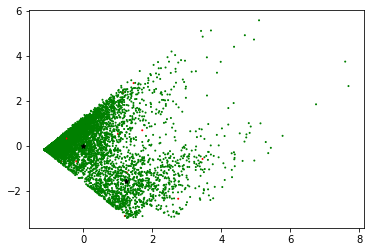

In [98]:
colores=['red','green']
asignar=[]
for row in y_pred:
     asignar.append(colores[row])

plt.scatter(X_test_ss[:,2], X_test_ss[:,3], c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.